<a href="https://colab.research.google.com/github/swapnamoy007/ML-ASSIGNMENT/blob/main/Module_5/Homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 7 for the Fall 2024 Course "Machine Learning for Materials Science", University of Tennessee Knoxville, Department of Materials Science and Engineering.

- Instructor Sergei V. Kalinin

# Problem 1 - Settings for decision making

The key element of decision making are:
- Objective(s)
- Reward(s)
- Actions
- States
- Value
- Policies

Select one topic (either from the list below, or use your own example) and identify what these elements can be:
- materials preparation by ceramic powder synthesis with XRay charatcerization of the product
- organic synthesis from known precursors
- growing tomatoes (or any other culture)
- playing chess
- choose your own

Answers:  
- Objective(s):
- Reward(s):
- Actions:
- States:
- Value:
- Policies:

In [3]:
#Objective(s): To maximize the removal efficiency of contaminants (e.g., phosphates) from wastewater.
#Reward(s): Measured success based on the extent of contaminant removal after the treatment process.
#Actions: Adjusting operational parameters such as current density, electrode material, or time of electrocoagulation.
#States: Information about the water quality, such as contaminant levels (silica, hardness) before treatment.
#Value: The expected effectiveness of each electrocoagulation setup (type and number of electrodes).
#Policies: Rules to optimize treatment performance under varying water conditions (saline water, textile water).


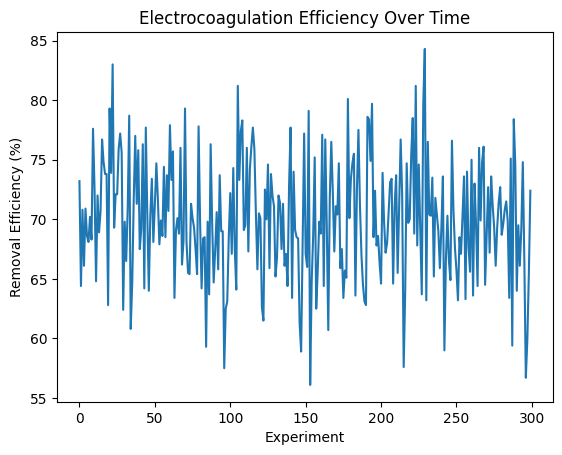

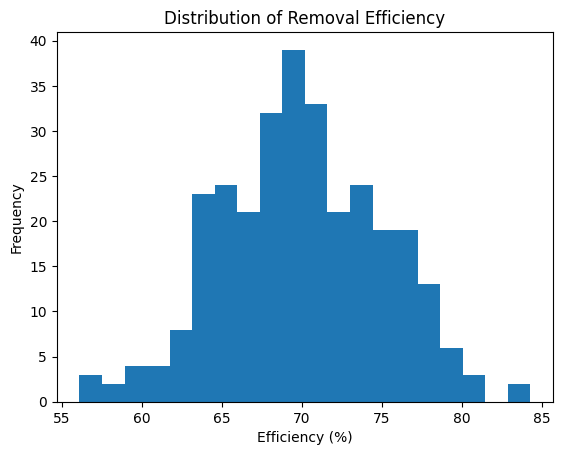

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating the electrocoagulation system
class ElectrocoagulationSystem:
    def __init__(self, mean_efficiency=70, std_efficiency=5):
        self.mean = mean_efficiency
        self.stdev = std_efficiency

    def treat_water(self):
        removal_efficiency = np.random.normal(self.mean, self.stdev)
        return np.round(removal_efficiency, 1)

# Create an electrocoagulation system
system = ElectrocoagulationSystem()

# Number of experiments (games)
n_experiments = 300
efficiencies = []

# Run the experiments and collect removal efficiencies (rewards)
for t in range(n_experiments):
    efficiency = system.treat_water()
    efficiencies.append(efficiency)

# Plot efficiency as a function of time
plt.plot(range(n_experiments), efficiencies)
plt.xlabel('Experiment')
plt.ylabel('Removal Efficiency (%)')
plt.title('Electrocoagulation Efficiency Over Time')
plt.show()

# Provide a histogram of the efficiencies
plt.hist(efficiencies, bins=20)
plt.xlabel('Efficiency (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Removal Efficiency')
plt.show()


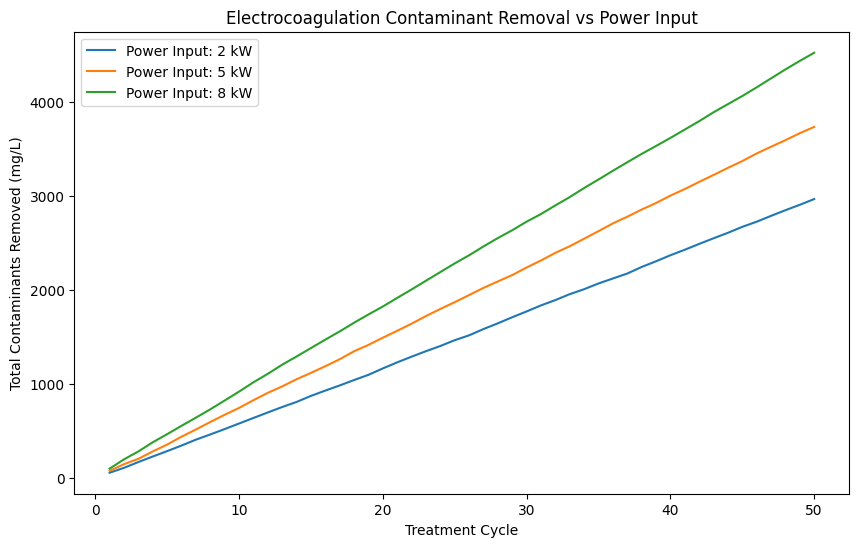

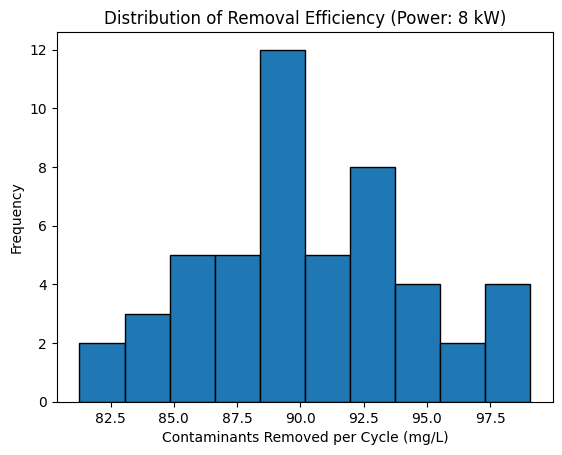

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class ElectrocoagulationSystem:
    def __init__(self, contaminant_level, power_input):
        self.contaminant_level = contaminant_level  # State: initial contaminant level
        self.power_input = power_input  # Action: power supplied
        self.max_efficiency = min(90, 50 + power_input * 5)  # System max efficiency increases with power

    def apply_treatment(self):
        efficiency = np.random.normal(self.max_efficiency, 5)  # Simulating system response
        contaminants_removed = self.contaminant_level * (efficiency / 100)
        return np.clip(contaminants_removed, 0, self.contaminant_level)  # Removed contaminants can't exceed current level

# Define initial conditions for different experiments
power_inputs = [2, 5, 8]  # Power levels in kW
initial_contaminant = 100  # mg/L contaminant concentration

# Simulate the treatment cycles for each power input level
n_treatments = 50
treatment_cycles = np.arange(1, n_treatments + 1)

plt.figure(figsize=(10, 6))
for power in power_inputs:
    system = ElectrocoagulationSystem(contaminant_level=initial_contaminant, power_input=power)
    remaining_contaminants = initial_contaminant
    removals = []

    for _ in treatment_cycles:
        removed = system.apply_treatment()
        remaining_contaminants -= removed
        removals.append(removed)

    # Plot contaminant removal over time
    plt.plot(treatment_cycles, np.cumsum(removals), label=f'Power Input: {power} kW')

plt.xlabel('Treatment Cycle')
plt.ylabel('Total Contaminants Removed (mg/L)')
plt.title('Electrocoagulation Contaminant Removal vs Power Input')
plt.legend()
plt.show()

# Plot histogram of contaminant removals for the last power input
plt.hist(removals, bins=10, edgecolor='black')
plt.xlabel('Contaminants Removed per Cycle (mg/L)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Removal Efficiency (Power: {power} kW)')
plt.show()


# Problem 2 - More decision making

Pick a paper of your choice (or use the same papers as we used in Module 1) and identify the objectives, reward, etc.

Answers: In the paper (name)
- Objective(s):
- Reward(s):
- Actions:
- States:
- Value:
- Policies:

#Paper- "Modeling and Optimization of COD Removal from Cold Meat Industry Wastewater by Electrocoagulation Using Computational Techniques"

Objective(s):
To maximize the removal efficiency of pollutants (like COD) from wastewater through electrocoagulation while minimizing operational costs and energy consumption.

Reward(s):
Higher pollutant removal rates (such as achieving 92% COD reduction), reduced energy consumption, and lower operational costs.

Actions:
Adjust the process parameters, such as pH levels, current density, and treatment duration (setting pH = 8.9, current density = 6.6 mA/cm²).

States:
The system’s state includes the current operational parameters (pH, current density, time), concentration of pollutants (COD), and energy usage.

Value:
The performance of the EC process, quantified by the removal efficiency of pollutants ( COD) and economic factors (energy consumption per cubic meter of water treated).

Policies:
An optimization algorithm that suggests the best parameter settings based on learned models from data. For instance, ANN or genetic algorithms adjust the pH, current, and duration to achieve the desired COD removal.

In [7]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import random

# Example data based on research article:
# Columns: [pH, current_density, time, COD_input, COD_output]
data = np.array([
    [5.5, 2.5, 30, 200, 20],
    [6.5, 3.0, 40, 300, 45],
    [7.0, 4.0, 50, 250, 30],
    [8.5, 5.0, 60, 300, 25],
    [7.5, 6.5, 40, 350, 50],
    [8.9, 6.6, 55, 400, 31],
    # Add more data as needed from your experimental observations or research
])

# Input parameters: [pH, current_density, time]
X = data[:, :3]
# Output: COD removal efficiency = (COD_input - COD_output) / COD_input * 100
y = (data[:, 3] - data[:, 4]) / data[:, 3] * 100

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Neural Network model for COD removal prediction
model = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict efficiency for test data
predictions = model.predict(X_test)
print(f"Predicted COD Removal Efficiencies: {predictions}")
print(f"Actual COD Removal Efficiencies: {y_test}")

# Moth-Flame Optimization (MFO) to optimize process parameters
def evaluate_fitness(params):
    # Predict COD removal efficiency for given [pH, current_density, time]
    return model.predict([params])[0]

# Initialize population of moths (random process parameter sets)
def initialize_population(size):
    return np.array([[random.uniform(5, 9), random.uniform(1, 7), random.uniform(30, 60)] for _ in range(size)])

# MFO Algorithm to optimize
def MFO_optimize(pop_size=20, iterations=10):
    moths = initialize_population(pop_size)
    best_fitness = -np.inf
    best_params = None

    for iteration in range(iterations):
        flames = moths.copy()  # Assume moths are their own flames initially
        for i in range(pop_size):
            fitness = evaluate_fitness(moths[i])
            if fitness > best_fitness:
                best_fitness = fitness
                best_params = moths[i]

        # Update moth positions based on flame attractiveness
        for i in range(pop_size):
            flame = flames[i]
            for j in range(3):  # Update each parameter (pH, current_density, time)
                distance = abs(flame[j] - moths[i][j])
                moths[i][j] = flame[j] - distance * random.uniform(-1, 1)

    return best_params, best_fitness

# Run the MFO optimization
optimized_params, optimized_efficiency = MFO_optimize()
print(f"Optimized Parameters (pH, current_density, time): {optimized_params}")
print(f"Optimized COD Removal Efficiency: {optimized_efficiency:.2f}%")


Predicted COD Removal Efficiencies: [53.43480757 68.96156669]
Actual COD Removal Efficiencies: [90. 85.]
Optimized Parameters (pH, current_density, time): [ 7.89732738  4.06412937 59.32060845]
Optimized COD Removal Efficiency: 98.39%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import random

# Example data (pH, current_density, time, COD_input, COD_output)
data = np.array([
    [5.5, 2.5, 30, 200, 20],  # Example row: (pH, current_density, time, COD_in, COD_out)
    [6.5, 3.0, 40, 300, 45],
    [7.0, 4.0, 50, 250, 30],
    [8.5, 5.0, 60, 300, 25],
    [7.5, 6.5, 40, 350, 50],
    [8.9, 6.6, 55, 400, 31],
    # Add more rows based on data in the research paper
])

# Inputs: [pH, current_density, time]
X = data[:, :3]
# Output: COD removal efficiency = (COD_input - COD_output) / COD_input * 100
y = (data[:, 3] - data[:, 4]) / data[:, 3] * 100

# Train-test split for model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Neural Network model
model = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict removal efficiency for test data
predictions = model.predict(X_test)
print(f"Predicted COD Removal Efficiencies: {predictions}")
print(f"Actual COD Removal Efficiencies: {y_test}")

# Define a function to evaluate fitness (removal efficiency prediction)
def evaluate_fitness(params):
    # Predict efficiency for a given state (pH, current_density, time)
    return model.predict([params])[0]

# Initialize a random population of moths (process parameters)
def initialize_population(size):
    return np.array([[random.uniform(5, 9), random.uniform(1, 7), random.uniform(30, 60)] for _ in range(size)])

# Moth-Flame Optimization (MFO) Algorithm
def MFO_optimize(pop_size=20, iterations=10):
    moths = initialize_population(pop_size)
    best_fitness = -np.inf
    best_params = None

    for iteration in range(iterations):
        flames = moths.copy()  # Assume moths are their own flames initially
        for i in range(pop_size):
            fitness = evaluate_fitness(moths[i])
            if fitness > best_fitness:
                best_fitness = fitness
                best_params = moths[i]

        # Update moth positions based on flame attractiveness
        for i in range(pop_size):
            flame = flames[i]
            for j in range(3):  # Update each parameter (pH, current_density, time)
                distance = abs(flame[j] - moths[i][j])
                moths[i][j] = flame[j] - distance * random.uniform(-1, 1)

    return best_params, best_fitness

# Run the MFO optimization
optimized_params, optimized_efficiency = MFO_optimize()
print(f"Optimized Parameters (pH, current_density, time): {optimized_params}")
print(f"Optimized COD Removal Efficiency: {optimized_efficiency:.2f}%")


Predicted COD Removal Efficiencies: [53.43480757 68.96156669]
Actual COD Removal Efficiencies: [90. 85.]
Optimized Parameters (pH, current_density, time): [ 8.92773035  6.30580539 55.9653721 ]
Optimized COD Removal Efficiency: 96.83%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


# Problem 3 - Analysis with ChatGPT

Now try to perform the same analysis using the ChatGPT. You may want to define what you are looking for via prompt.

Answer:

Objective(s):
In electrocoagulation, the primary objective is to remove contaminants such as COD from water. The goal is to achieve the highest removal efficiency while minimizing energy consumption and operational costs.

Reward(s):
The reward is quantified by improved water quality, reflected in the concentration of contaminants after treatment. Higher rewards are given for lower contaminant concentrations, such as reducing fluoride levels to meet health standards. Operational rewards might also consider lower energy usage or minimal sludge generation.

Actions:
The actions correspond to the adjustable parameters of the EC process. These include:

Adjusting current density
Changing the applied voltage
Modifying treatment time
Adjusting pH levels
Controlling the electrode material and spacing
Each action affects the overall process efficiency, energy consumption, and sludge production.

States:
The states are defined by the current operating conditions of the EC system. A "state" includes factors like the current concentration of contaminants in the water, the applied current or voltage, pH levels, and temperature. It also encompasses whether the system is in batch mode or continuous flow mode.

Value:
The value function estimates the success of the process at a given state. For instance, this could be the likelihood of reaching a target contaminant removal rate while minimizing operational costs. The value can be derived using machine learning models, which predict outcomes based on input variables like current density or pH.

Policies:
Policies represent the strategies or rules that guide decision-making for adjusting the system. For example, an AI-driven policy might recommend increasing current density under certain conditions to optimize contaminant removal, or it might adjust pH levels to reduce energy consumption. These policies can be dynamically adapted through continuous learning from the EC system's performance.

In [12]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from scipy.optimize import minimize
import random

# Data example based on electrocoagulation (adjust values with real dataset)
# Features: [pH, current_density (mA/cm^2), time (minutes)]
# Target: COD removal efficiency (%)
X_train = np.array([[6.5, 2.5, 40], [8.0, 5.0, 50], [7.0, 3.0, 60], [6.0, 4.0, 45]])
y_train = np.array([90, 85, 88, 80])

# Create a neural network model (MLPRegressor)
model = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=2000, random_state=42)
model.fit(X_train, y_train)

# Define a function to predict COD removal efficiency and cap it at 100%
def predict_efficiency(parameters):
    efficiency = model.predict([parameters])[0]
    return min(efficiency, 100)  # Cap efficiency at 100%

# Define objective function to maximize COD removal efficiency (minimization requires negative)
def objective_function(parameters):
    return -predict_efficiency(parameters)  # Negate because 'minimize' minimizes by default

# Define constraints for the optimization (within typical electrocoagulation parameter ranges)
bounds = [(5, 9),  # pH
          (1, 6),  # current_density (mA/cm^2)
          (30, 60)]  # time (minutes)

# Simulate policy actions to optimize the parameters
def policy(state, model):
    # Use optimization algorithm to find best parameters
    result = minimize(objective_function, state, method='L-BFGS-B', bounds=bounds)
    optimized_state = result.x  # Optimized parameters (pH, current_density, time)
    optimized_efficiency = -result.fun  # Optimized COD removal efficiency
    return optimized_state, optimized_efficiency

# Example initial state: starting parameters (pH, current_density, time)
initial_state = [7.0, 2.5, 45]  # Example initial conditions

# Apply the policy to find optimized parameters
optimized_state, optimized_efficiency = policy(initial_state, model)

# Display the results
print("Predicted COD Removal Efficiencies:", model.predict(X_train))
print("Actual COD Removal Efficiencies:", y_train)
print("Optimized Parameters (pH, current_density, time):", optimized_state)
print(f"Optimized COD Removal Efficiency: {optimized_efficiency:.2f}%")

# Simulate policy adjustments over several iterations
for _ in range(5):  # Apply the policy for 5 steps
    optimized_state, efficiency = policy(initial_state, model)
    print(f"New State: {optimized_state}, Predicted Efficiency: {efficiency:.2f}%")


Predicted COD Removal Efficiencies: [88.58348396 88.98435464 89.81152101 74.39643988]
Actual COD Removal Efficiencies: [90 85 88 80]
Optimized Parameters (pH, current_density, time): [ 9.         1.        44.9488594]
Optimized COD Removal Efficiency: 100.00%
New State: [ 9.         1.        44.9488594], Predicted Efficiency: 100.00%
New State: [ 9.         1.        44.9488594], Predicted Efficiency: 100.00%
New State: [ 9.         1.        44.9488594], Predicted Efficiency: 100.00%
New State: [ 9.         1.        44.9488594], Predicted Efficiency: 100.00%
New State: [ 9.         1.        44.9488594], Predicted Efficiency: 100.00%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


# Problem 4 - Building a casino

Define the Casino with the 3 Bandits with the probabilities of win being given by Gaussian distributions with the parameters (mean, dispersion) being (6, 2) for the first one (A), (5,3) for the second one (B), and (5.5, 0.2) for the third one (C). You can adapt the code from the example notebook.

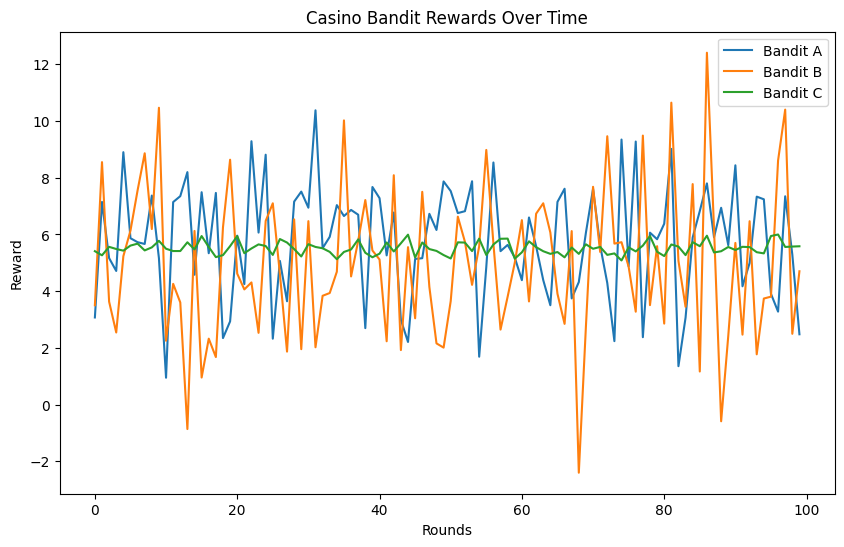

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Bandit class representing a Gaussian-distributed slot machine
class Bandit:
    def __init__(self, mean, dispersion):
        self.mean = mean
        self.dispersion = dispersion

    def pull(self):
        return np.random.normal(self.mean, self.dispersion)

# Casino class containing multiple bandits
class Casino:
    def __init__(self):
        self.bandits = {
            "A": Bandit(6, 2),
            "B": Bandit(5, 3),
            "C": Bandit(5.5, 0.2)
        }

    def pull_bandit(self, bandit_name):
        return self.bandits[bandit_name].pull()

# Simulate casino game
def simulate_casino(casino, rounds):
    results = {name: [] for name in casino.bandits}
    for _ in range(rounds):
        for name in results:
            results[name].append(casino.pull_bandit(name))
    return results

# Plot results
def plot_results(results):
    plt.figure(figsize=(10, 6))
    for bandit, rewards in results.items():
        plt.plot(rewards, label=f"Bandit {bandit}")
    plt.title("Casino Bandit Rewards Over Time")
    plt.xlabel("Rounds")
    plt.ylabel("Reward")
    plt.legend()
    plt.show()

# Main
if __name__ == "__main__":
    casino = Casino()
    results = simulate_casino(casino, 100)
    plot_results(results)


Now let's assume that we playing these in parallel. For a single run, calculate the average and dispecrion of cumulative reward as a number of plays. Plot the mean with error bars (dispersion) on the log scale for time. At which point can we decide which of the bandits gives biggest wins?

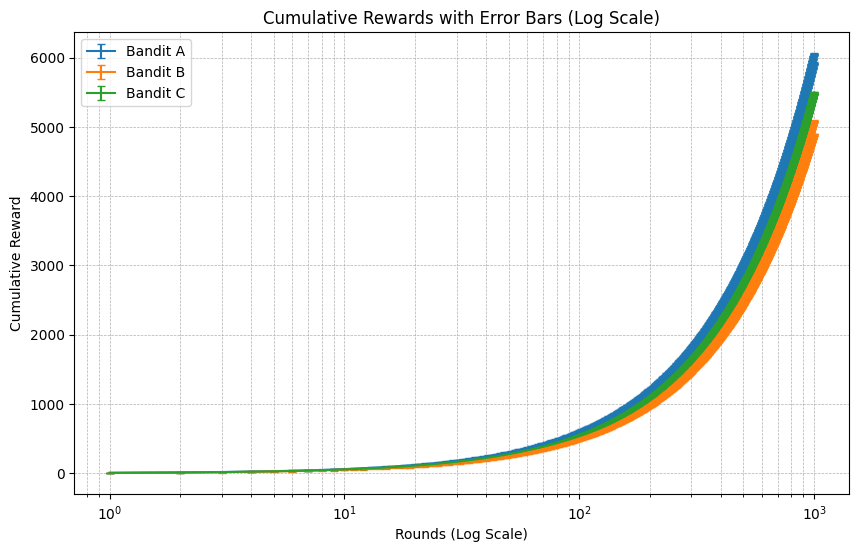

In [3]:
# Bandit class representing a Gaussian-distributed slot machine
class Bandit:
    def __init__(self, mean, dispersion):
        self.mean = mean
        self.dispersion = dispersion

    def pull(self):
        return np.random.normal(self.mean, self.dispersion)

# Casino class with multiple bandits
class Casino:
    def __init__(self):
        self.bandits = {
            "A": Bandit(6, 2),
            "B": Bandit(5, 3),
            "C": Bandit(5.5, 0.2)
        }

    def pull_bandit(self, bandit_name):
        return self.bandits[bandit_name].pull()

# Simulate playing the bandits in parallel
def simulate_casino_parallel(casino, rounds, trials):
    rewards = {bandit: np.zeros((trials, rounds)) for bandit in casino.bandits}

    for trial in range(trials):
        for bandit in rewards:
            cumulative_reward = 0
            for round_num in range(rounds):
                reward = casino.pull_bandit(bandit)
                cumulative_reward += reward
                rewards[bandit][trial, round_num] = cumulative_reward

    return rewards

# Compute statistics (mean and std) of cumulative rewards
def calculate_statistics(rewards):
    stats = {}
    for bandit, data in rewards.items():
        stats[bandit] = {
            "mean": np.mean(data, axis=0),
            "std": np.std(data, axis=0)
        }
    return stats

# Plot the results with error bars and log scale for time
def plot_results(stats, rounds):
    plt.figure(figsize=(10, 6))
    x = np.arange(1, rounds + 1)

    for bandit, stat in stats.items():
        plt.errorbar(x, stat["mean"], yerr=stat["std"], label=f"Bandit {bandit}", capsize=3)

    plt.xscale('log')
    plt.title("Cumulative Rewards with Error Bars (Log Scale)")
    plt.xlabel("Rounds (Log Scale)")
    plt.ylabel("Cumulative Reward")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

# Main function to run the simulation
if __name__ == "__main__":
    casino = Casino()
    num_rounds = 1000
    num_trials = 1000

    # Run simulation and calculate statistics
    cumulative_rewards = simulate_casino_parallel(casino, num_rounds, num_trials)
    stats = calculate_statistics(cumulative_rewards)

    # Plot the results
    plot_results(stats, num_rounds)


Now, let's assume that we **do not** know the probability distirbutions of wins, and have to decide which of the hands A, B, or C to play. First, realize the A/B testing strategy. Show the returns for 10, 30, 100, 300, 1000, 3000 test runs and 10000 total number of attempts

Test runs: 10, Best bandit: C, Cumulative reward: 55015.02
Test runs: 30, Best bandit: A, Cumulative reward: 59999.98
Test runs: 100, Best bandit: A, Cumulative reward: 59407.06
Test runs: 300, Best bandit: A, Cumulative reward: 59327.53
Test runs: 1000, Best bandit: A, Cumulative reward: 58547.31
Test runs: 3000, Best bandit: A, Cumulative reward: 55486.05


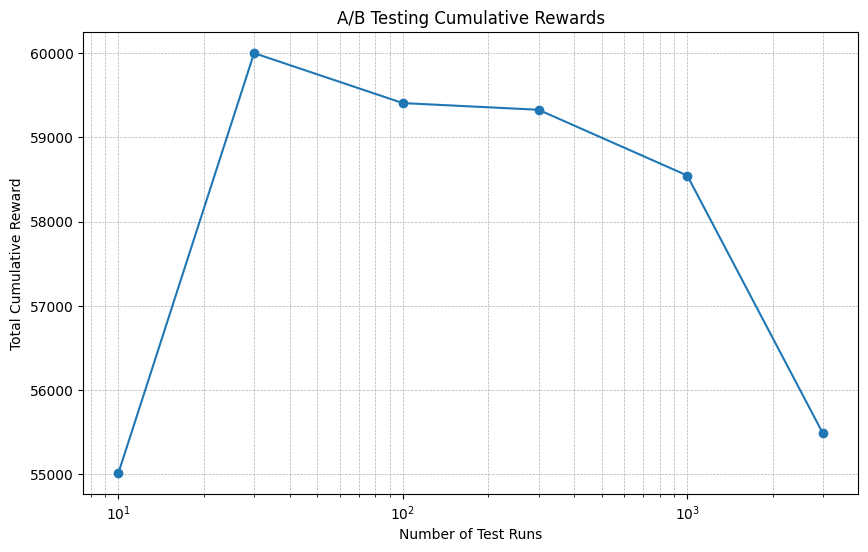

In [4]:

# Bandit class representing a Gaussian-distributed slot machine
class Bandit:
    def __init__(self, mean, dispersion):
        self.mean = mean
        self.dispersion = dispersion

    def pull(self):
        return np.random.normal(self.mean, self.dispersion)

# Casino class containing multiple bandits
class Casino:
    def __init__(self):
        self.bandits = {
            "A": Bandit(6, 2),
            "B": Bandit(5, 3),
            "C": Bandit(5.5, 0.2)
        }

    def pull_bandit(self, bandit_name):
        return self.bandits[bandit_name].pull()

# A/B testing strategy to evaluate bandits
def ab_test_strategy(casino, total_attempts, test_runs_list):
    results = {}

    for test_runs in test_runs_list:
        # Exploration phase: allocate test_runs equally to all bandits
        test_rewards = {bandit: [] for bandit in casino.bandits}
        for bandit in test_rewards:
            test_rewards[bandit] = [casino.pull_bandit(bandit) for _ in range(test_runs)]

        # Calculate average rewards during test phase
        avg_rewards = {bandit: np.mean(rewards) for bandit, rewards in test_rewards.items()}
        best_bandit = max(avg_rewards, key=avg_rewards.get)

        # Exploitation phase: Use best bandit for remaining attempts
        remaining_attempts = total_attempts - test_runs * len(casino.bandits)
        cumulative_reward = sum([sum(rewards) for rewards in test_rewards.values()])

        for _ in range(remaining_attempts):
            cumulative_reward += casino.pull_bandit(best_bandit)

        results[test_runs] = cumulative_reward
        print(f"Test runs: {test_runs}, Best bandit: {best_bandit}, Cumulative reward: {cumulative_reward:.2f}")

    return results

# Plot results for cumulative rewards vs test runs
def plot_ab_test_results(results):
    plt.figure(figsize=(10, 6))
    test_runs = list(results.keys())
    cumulative_rewards = list(results.values())

    plt.plot(test_runs, cumulative_rewards, marker='o')
    plt.xscale('log')
    plt.title("A/B Testing Cumulative Rewards")
    plt.xlabel("Number of Test Runs")
    plt.ylabel("Total Cumulative Reward")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

# Main function to run the A/B testing strategy and plot the results
def main():
    casino = Casino()
    total_attempts = 10000
    test_runs_list = [10, 30, 100, 300, 1000, 3000]

    results = ab_test_strategy(casino, total_attempts, test_runs_list)
    plot_ab_test_results(results)

# Run the main function
if __name__ == "__main__":
    main()


Now realize the same exploration for the epsilon-greedy policy with several epsilon values

Epsilon: 0.01, Cumulative Reward: 60263.64
Epsilon: 0.05, Cumulative Reward: 59520.21
Epsilon: 0.1, Cumulative Reward: 59774.45
Epsilon: 0.2, Cumulative Reward: 59378.75
Epsilon: 0.3, Cumulative Reward: 58695.39
Epsilon: 0.5, Cumulative Reward: 57304.05


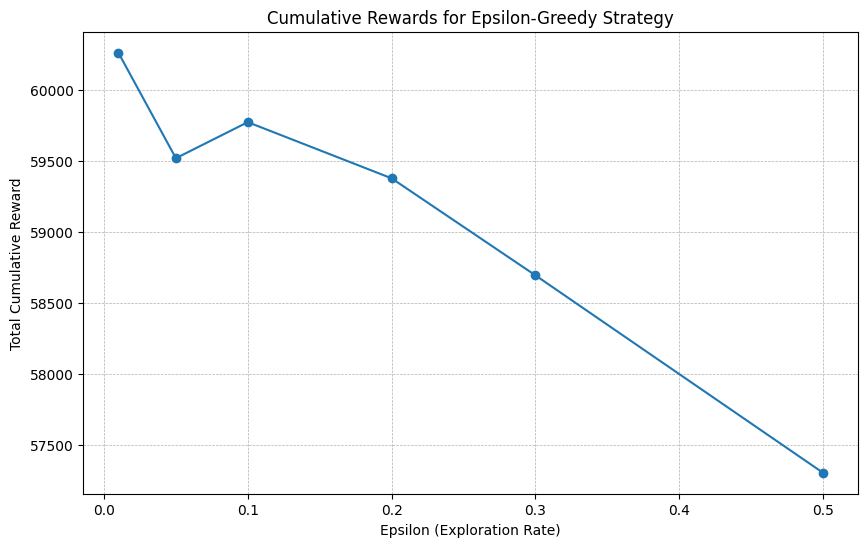

In [5]:
# Bandit class representing a slot machine with Gaussian rewards
class Bandit:
    def __init__(self, mean, dispersion):
        self.mean = mean
        self.dispersion = dispersion
        self.estimated_reward = 0
        self.pull_count = 0

    def pull(self):
        return np.random.normal(self.mean, self.dispersion)

    def update_estimated_reward(self, reward):
        self.pull_count += 1
        self.estimated_reward += (reward - self.estimated_reward) / self.pull_count

# Casino class containing multiple bandits
class Casino:
    def __init__(self):
        self.bandits = {
            "A": Bandit(6, 2),
            "B": Bandit(5, 3),
            "C": Bandit(5.5, 0.2)
        }

    def pull_bandit(self, bandit_name):
        return self.bandits[bandit_name].pull()

# Epsilon-greedy strategy for exploration and exploitation
def epsilon_greedy_strategy(casino, epsilon, total_attempts):
    cumulative_reward = 0
    bandit_names = list(casino.bandits.keys())

    for _ in range(total_attempts):
        if np.random.random() < epsilon:  # Exploration: random bandit
            chosen_bandit = np.random.choice(bandit_names)
        else:  # Exploitation: choose bandit with highest estimated reward
            chosen_bandit = max(bandit_names, key=lambda b: casino.bandits[b].estimated_reward)

        reward = casino.pull_bandit(chosen_bandit)
        casino.bandits[chosen_bandit].update_estimated_reward(reward)
        cumulative_reward += reward

    return cumulative_reward

# Run epsilon-greedy experiments for different epsilon values
def run_epsilon_greedy_experiments(casino, epsilon_values, total_attempts):
    results = {}

    for epsilon in epsilon_values:
        # Reset bandits' estimated rewards before each experiment
        for bandit in casino.bandits.values():
            bandit.estimated_reward = 0
            bandit.pull_count = 0

        # Run the epsilon-greedy strategy
        cumulative_reward = epsilon_greedy_strategy(casino, epsilon, total_attempts)
        results[epsilon] = cumulative_reward
        print(f"Epsilon: {epsilon}, Cumulative Reward: {cumulative_reward:.2f}")

    return results

# Plot the results of cumulative rewards for different epsilon values
def plot_epsilon_greedy_results(results):
    epsilon_values = list(results.keys())
    cumulative_rewards = list(results.values())

    plt.figure(figsize=(10, 6))
    plt.plot(epsilon_values, cumulative_rewards, marker='o')
    plt.title("Cumulative Rewards for Epsilon-Greedy Strategy")
    plt.xlabel("Epsilon (Exploration Rate)")
    plt.ylabel("Total Cumulative Reward")
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.show()

# Main function to run experiments and plot results
def main():
    casino = Casino()
    total_attempts = 10000
    epsilon_values = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]

    results = run_epsilon_greedy_experiments(casino, epsilon_values, total_attempts)
    plot_epsilon_greedy_results(results)

# Run the main function
if __name__ == "__main__":
    main()


And finally UCB with several values of parameter beta.

Running UCB with beta = 0.1...
Cumulative reward for beta = 0.1: 55007.74
Running UCB with beta = 0.5...
Cumulative reward for beta = 0.5: 54987.06
Running UCB with beta = 1...
Cumulative reward for beta = 1: 59615.60
Running UCB with beta = 2...
Cumulative reward for beta = 2: 59835.75
Running UCB with beta = 5...
Cumulative reward for beta = 5: 59421.61
Running UCB with beta = 10...
Cumulative reward for beta = 10: 59040.69


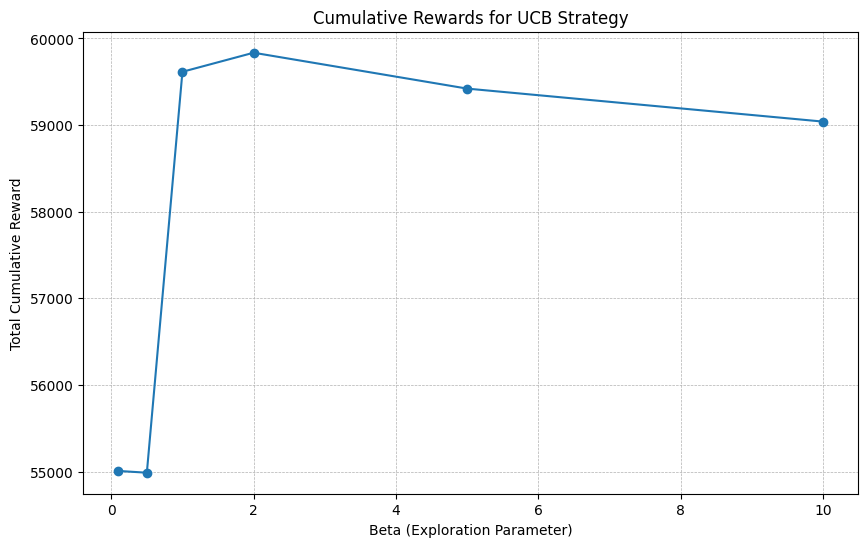

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Bandit class representing a slot machine with Gaussian rewards
class Bandit:
    def __init__(self, mean, dispersion):
        self.mean = mean
        self.dispersion = dispersion
        self.estimated_reward = 0
        self.pull_count = 0

    def pull(self):
        return np.random.normal(self.mean, self.dispersion)

    def update_estimated_reward(self, reward):
        self.pull_count += 1
        self.estimated_reward += (reward - self.estimated_reward) / self.pull_count

# Casino class containing multiple bandits
class Casino:
    def __init__(self):
        self.bandits = {
            "A": Bandit(6, 2),
            "B": Bandit(5, 3),
            "C": Bandit(5.5, 0.2)
        }

    def pull_bandit(self, bandit_name):
        return self.bandits[bandit_name].pull()

# UCB strategy for exploration and exploitation
def ucb_strategy(casino, beta, total_attempts):
    cumulative_reward = 0
    total_pulls = 0

    # Pull each bandit once initially
    for bandit_name in casino.bandits.keys():
        reward = casino.pull_bandit(bandit_name)
        casino.bandits[bandit_name].update_estimated_reward(reward)
        cumulative_reward += reward
        total_pulls += 1

    # Continue with UCB strategy
    for _ in range(total_attempts - len(casino.bandits)):
        ucb_values = {}
        for bandit_name, bandit in casino.bandits.items():
            if bandit.pull_count > 0:
                ucb_value = bandit.estimated_reward + beta * np.sqrt(np.log(total_pulls) / bandit.pull_count)
            else:
                ucb_value = float('inf')  # Explore untested bandits
            ucb_values[bandit_name] = ucb_value

        # Select bandit with the highest UCB value
        chosen_bandit = max(ucb_values, key=ucb_values.get)
        reward = casino.pull_bandit(chosen_bandit)
        casino.bandits[chosen_bandit].update_estimated_reward(reward)
        cumulative_reward += reward
        total_pulls += 1

    return cumulative_reward

# Run UCB strategy for different beta values
def run_ucb_experiments(casino, beta_values, total_attempts):
    results = {}
    for beta in beta_values:
        print(f"Running UCB with beta = {beta}...")
        # Reset bandits' estimated rewards before each experiment
        for bandit in casino.bandits.values():
            bandit.estimated_reward = 0
            bandit.pull_count = 0

        # Run UCB strategy
        cumulative_reward = ucb_strategy(casino, beta, total_attempts)
        results[beta] = cumulative_reward
        print(f"Cumulative reward for beta = {beta}: {cumulative_reward:.2f}")
    return results

# Plot the cumulative rewards for different beta values
def plot_ucb_results(results):
    beta_values = list(results.keys())
    cumulative_rewards = list(results.values())

    plt.figure(figsize=(10, 6))
    plt.plot(beta_values, cumulative_rewards, marker='o')
    plt.title("Cumulative Rewards for UCB Strategy")
    plt.xlabel("Beta (Exploration Parameter)")
    plt.ylabel("Total Cumulative Reward")
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.show()

# Main function to run experiments and plot results
def main():
    casino = Casino()
    total_attempts = 10000
    beta_values = [0.1, 0.5, 1, 2, 5, 10]

    results = run_ucb_experiments(casino, beta_values, total_attempts)
    plot_ucb_results(results)

# Run the main function
if __name__ == "__main__":
    main()


Disucss the relative merits and drawbacks for the A/B testing, epsilon-greedy, and USB.

A/B Testing
Merits: Simple and statistically rigorous for comparing fixed options
Drawbacks: Slow to adapt and doesn't dynamically learn from results.

Epsilon-Greedy
Merits: Balances exploration and exploitation, continuously updates based on results.
Drawbacks: Fixed exploration rate leads to unnecessary exploration even when a good option is found.

Upper Confidence Bound (UCB)
Merits: Efficient exploration, dynamically adjusts based on uncertainty, minimizing regret.
Drawbacks: More complex to implement and sensitive to parameter tuning